<a href="https://colab.research.google.com/github/YassinOmer26/BCG-Data-Science-Advanced-Analytics/blob/main/Task%202/Exploratory_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://raw.githubusercontent.com/srgarcess/BCG/main/assets/BCG_MONOGRAM.png" alt = "BCG  icon" width="50%" height="80%">
</p>
<br><br>

# **Exploratory Data Analysis and Cleaning**
By Yassin Omer

## **The Datasets**
The dataset `price_data.csv` contains:
>*  `id`: contact id
* `price_date`: reference date
* `price_off_peak_var` = price of energy for the 1st period (off peak)
* `price_peak_var = price` of energy for the 2nd period (peak)
* `price_mid_peak_var` = price of energy for the 3rd period (mid peak)
* `price_off_peak_fix` = price of power for the 1st period (off peak)
* `price_peak_fix` = price of power for the 2nd period (peak)
* `price_mid_peak_fix` = price of power for the 3rd period (mid peak)



The dataset `client_data` contains:
* `id` = client company identifier

* `activity_new` = category of the company’s activity

* `channel_sales` = code of the sales channel

* `cons_12m` = electricity consumption of the past 12 months

* `cons_gas_12m` = gas consumption of the past 12 months

* `cons_last_month` = electricity consumption of the last month

* `date_activ` = date of activation of the contract

* `date_end` = registered date of the end of the contract

* `date_modif_prod` = date of the last modification of the product

* `date_renewal` = date of the next contract renewal

* `forecast_cons_12m` = forecasted electricity consumption for next 12 months

* `forecast_cons_year` = forecasted electricity consumption for the next calendar year

* `forecast_discount_energy` = forecasted value of current discount

* `forecast_meter_rent_12m` = forecasted bill of meter rental for the next 2 months

* `forecast_price_energy_off_peak` = forecasted energy price for 1st period (off peak)

* `forecast_price_energy_peak` = forecasted energy price for 2nd period (peak)

* `forecast_price_pow_off_peak` = forecasted power price for 1st period (off peak)

* `has_gas` = indicated if client is also a gas 

* `imp_cons` = current paid consumption

* `margin_gross_pow_ele` = gross margin on power subscription

* `margin_net_pow_ele` = net margin on power subscription

* `nb_prod_act` = number of active products and services

* `net_margin` = total net margin

* `num_years_antig` = antiquity of the client (in number of years)

* `origin_up` = code of the electricity campaign the customer first subscribed to

* `pow_max` = subscribed power

* `churn` = has the client churned over the next 3 months


#**Importing Libraries and Datasets**

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from datetime import datetime, timedelta
import scipy.stats 
from scipy.stats import zscore as zscore
import missingno as msno

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


Now that we have our libraries imported now we will import & read the
.csv datasets from our Github Repository

In [3]:
# Read in dataset
url = 'https://raw.githubusercontent.com/YassinOmer26/BCG-Data-Science-Advanced-Analytics/main/Task%202/price_data.csv'
url1 = 'https://raw.githubusercontent.com/YassinOmer26/BCG-Data-Science-Advanced-Analytics/main/Task%202/client_data%20(1).csv'

price_df = pd.read_csv(url)
client_df = pd.read_csv(url1, parse_dates=['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'],
                dayfirst=True)


In [4]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


*Note: 
Churn is located here in this dataframe

0=Stayed and 1=Churned

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

Note*
* `date_activ`, `date_end`, 
`date_modif_prod`, and `date_renewal` was in object format and `parse_dates`function changed it to datetime format

In [6]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [ ]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'], dtype='object')

In [8]:
from pandas.core.reshape.merge import merge
#Create a New Copy of Client_Data & Drop all Columns except Id & Churn
Churn_Output=pd.merge(client_df, price_df, on= "id", how= 'outer')

In [9]:
##View New Table
Churn_Output.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2.0,678.99,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2.0,678.99,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2.0,678.99,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2.0,678.99,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2.0,678.99,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [10]:
##Create new DF Named "Churn_Output" which contains only "ID" and "Churn"
Churn_Output= client_df.drop(columns=['channel_sales','cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m','forecast_price_energy_peak' ,'forecast_price_energy_off_peak', 'forecast_price_pow_off_peak', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up', 'pow_max'])

In [11]:
# Replace the churn column with appropiate labels
Churn_Output['churn'] = Churn_Output['churn'].replace({0:'Stayed',1:'Churned'})

Churn_Output.head(20)

,id,churn
0,24011ae4ebbe3035111d65fa7c15bc57,Churned
1,d29c2c54acc38ff3c0614d0a653813dd,Stayed
2,764c75f661154dac3a6c254cd082ea7d,Stayed
3,bba03439a292a1e166f80264c16191cb,Stayed
4,149d57cf92fc41cf94415803a877cb4b,Stayed
5,1aa498825382410b098937d65c4ec26d,Churned
6,7ab4bf4878d8f7661dfc20e9b8e18011,Churned
7,01495c955be7ec5e7f3203406785aae0,Stayed
8,f53a254b1115634330c12c7fdbf7958a,Stayed
9,10c1b2f97a2d2a6f10299dc213d1a370,Stayed


In [ ]:
# What number of customers have churned in the last 3 months?
attrition_count = Churn_Output['churn'].value_counts()
print('Total Number of Churned Customers:\n', attrition_count)

Total Number of Churned Customers:
 Stayed     13187
Churned     1419
Name: churn, dtype: int64


In [ ]:
# What is the proportion of customer attrition in the last 3 months?
attrition_rate = Churn_Output['churn'].value_counts() / Churn_Output.shape[0] * 100
print('Attrition rate: \n', attrition_rate)

Attrition rate: 
 Stayed     90.284814
Churned     9.715186
Name: churn, dtype: float64


## **The Price Dataset**

In [ ]:
##Display the yearly consumption of energt and power of customer
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [ ]:
## Examining the structure of dataframe
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [ ]:
## Change 'Price_date' from object to datetime
price_df['price_date'] =  pd.to_datetime(price_df['price_date'], format='%d%b%Y:%H:%M:%S.%f')

ValueError: ignored

In [ ]:
## Examine the descriptive statistics of the dataframe
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [ ]:
# Identify the nullity of the dataframe
missing_values_price = price_df.isna().sum()
print('Total Missing Values:\n', missing_values_price)

Total Missing Values:
 id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64


In [ ]:
# Identify the percentage of nullity in the dataframe for each column
missing_values_price_percent = price_df.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_values_price_percent)

Percentage of Missing Values:
 id                    0.0
price_date            0.0
price_off_peak_var    0.0
price_peak_var        0.0
price_mid_peak_var    0.0
price_off_peak_fix    0.0
price_peak_fix        0.0
price_mid_peak_fix    0.0
dtype: float64


---
###**Facts**

* The average price of energy for the first period was: \$0.14
* The average price of energy for the second period was: \$0.05
* The average price of energy for the third period was: \$0.03

`The average price of energy was declining in the last year`

* The average power of power for the first period was:\$43.33
* The average power of power for the second period was:\$10.62
* The average power of power for the third period was: \$6.41

##**DATA CLEANING AND COMPUTATION**

## **Dealing with Missing Data**

1. Convert all missing values to NULL values
2. Analyze the amount and type of missingness in the data
3. Appropriately delete ir impute missing values
4. Evaluate and compare the perfomrance of the treated/imputed dataset

#**The Price Dataset**


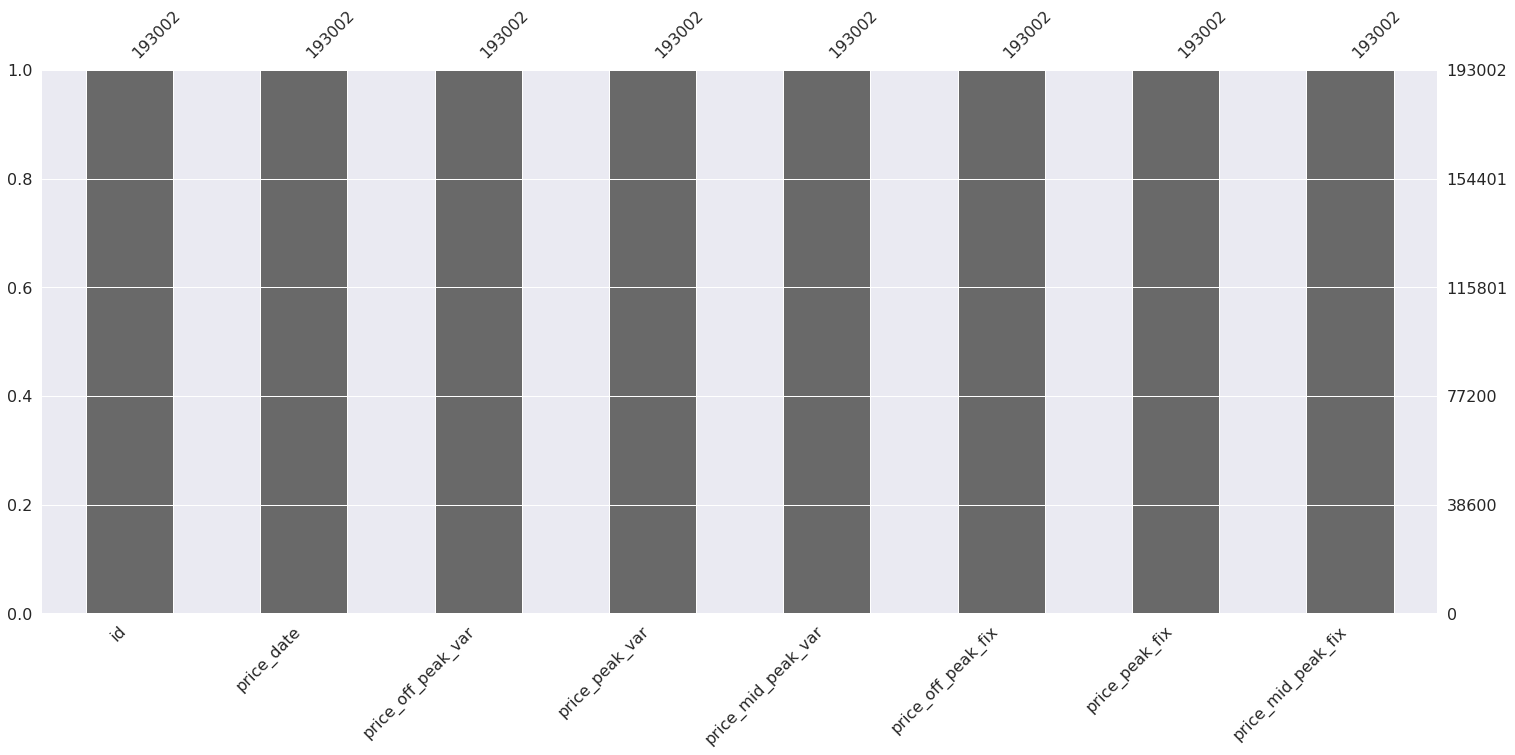

In [ ]:
##Visualizing the Missingness
msno.bar(price_df)

* Shown earlier and represented visually: the `price_df` has no missing values 

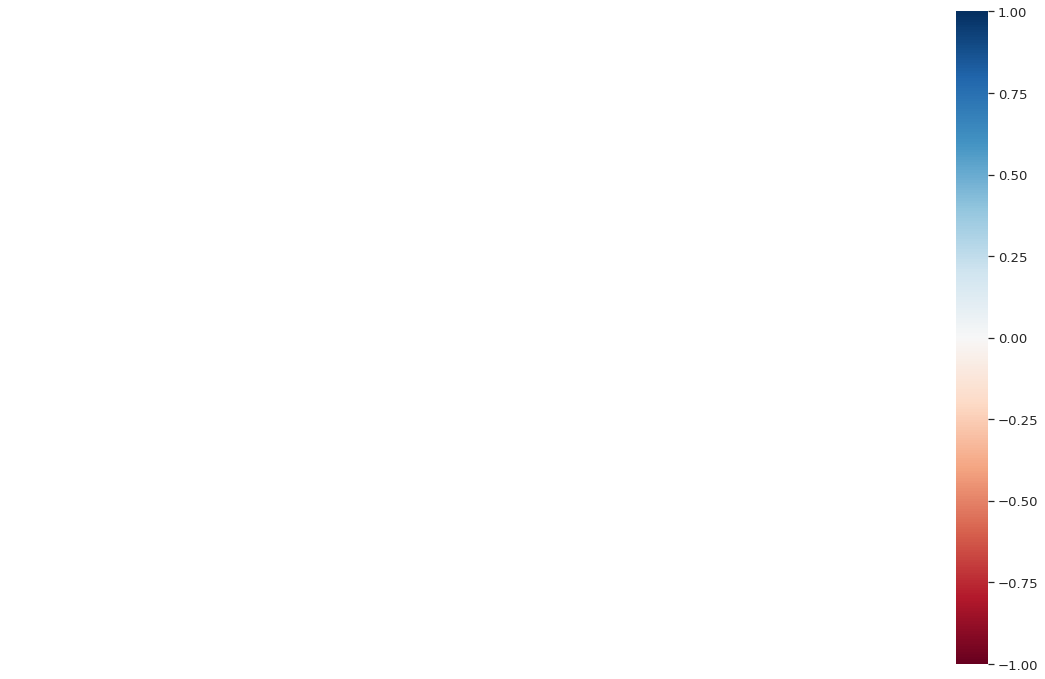

In [ ]:
##Visualize the correlation between numeric variables of the dataframe
msno.heatmap(price_df)

In [ ]:
#Identify the Index of IDs containing missing values
price_df_NAN_Index= price_df[price_df.isnull(). any(axis=1)].index.values.tolist()

##Obatin a df with missing values
price_df_missing = price_df.iloc[price_df_NAN_Index]

#glimpse at NaN cases of the price_df 
price_df_missing.head(10)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix


##*Observed**
NO MISSING VALUES CONFIRMED

## **Client Dataset**

In [ ]:
# Take a quick glance at dataset
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [ ]:
# Print Info on columns
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [ ]:
# Identify the nullity of the dataframe
missing_values_client = client_df.isna().sum()
print('Total Missing Values:\n', missing_values_client)

Total Missing Values:
 id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64


In [ ]:
# Identify the percentage of nullity in the dataframe for each column
missing_values_client_percent = client_df.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_values_client_percent)

Percentage of Missing Values:
 id                                0.0
channel_sales                     0.0
cons_12m                          0.0
cons_gas_12m                      0.0
cons_last_month                   0.0
date_activ                        0.0
date_end                          0.0
date_modif_prod                   0.0
date_renewal                      0.0
forecast_cons_12m                 0.0
forecast_cons_year                0.0
forecast_discount_energy          0.0
forecast_meter_rent_12m           0.0
forecast_price_energy_off_peak    0.0
forecast_price_energy_peak        0.0
forecast_price_pow_off_peak       0.0
has_gas                           0.0
imp_cons                          0.0
margin_gross_pow_ele              0.0
margin_net_pow_ele                0.0
nb_prod_act                       0.0
net_margin                        0.0
num_years_antig                   0.0
origin_up                         0.0
pow_max                           0.0
churn              

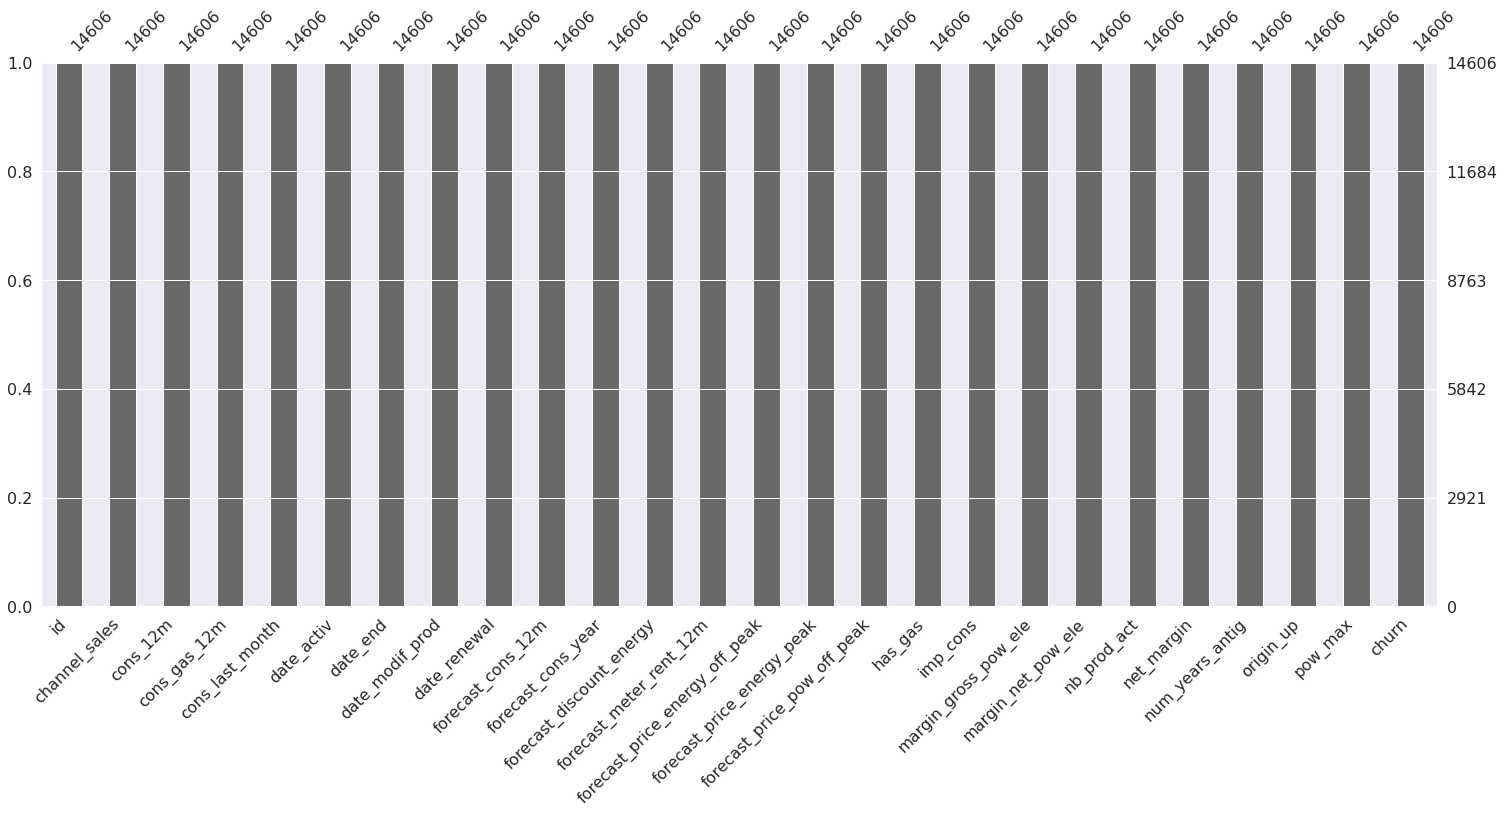

In [ ]:
##Visualizing the Missingness
msno.bar(client_df)

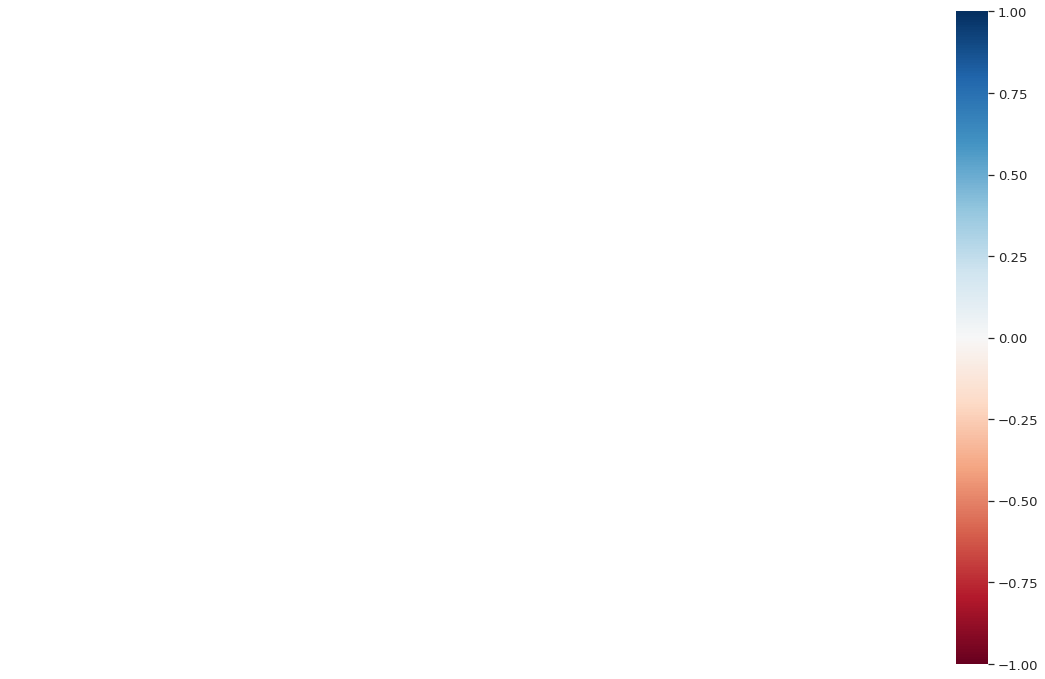

In [ ]:
##Visualize the correlation between numeric variables of the dataframe
msno.heatmap(client_df)

In [ ]:
#Identify the Index of IDs containing missing values
client_df_NAN_Index= client_df[client_df.isnull(). any(axis=1)].index.values.tolist()

##Obatin a df with missing values
client_df_missing = client_df.iloc[client_df_NAN_Index]

#glimpse at NaN cases of the price_df 
client_df_missing.head(10)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


In [ ]:
# Examine the descriptive statistics of the main dataset
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


##**Observed**
NO MISSING VALUES CONFIRMED

**Facts:** 
* Average Tenure Length 4.99 
* Average Net Margin is 189.26

##Merge churn_output and price_df

In [ ]:
#Convert the has_gas column to Yes/No
client_df['has_gas'] = client_df['has_gas'].replace({'t':'Yes','f':'No'})

#Convert the churn column to churned/stayed
client_df['churn'] = client_df['churn'].replace({1:'Churned', 0:'Stayed'})

In [ ]:
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,Yes,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,Churned
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,No,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,Stayed
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,No,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,Stayed
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,No,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,Stayed
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,No,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,Stayed


In [ ]:
# Obtain all the variables except for id
variables = [column_name for column_name in client_df.columns if column_name != 'id']

#Obtain all the categorical variables except for id
categorical = [column_name for column_name in variables if client_df[column_name].dtype == 'object']

#Obtain all the date variables
dates = [column_name for column_name in variables if client_df[column_name].dtype == 'datetime64[ns]']

#Obtain all the numeric columns
numeric = [column_name for column_name in variables
           if column_name not in categorical
           and column_name !='id'
           and column_name != 'churn'
           and column_name not in dates]

# **Data Visualization**


#**Visualizing Client Dataframe

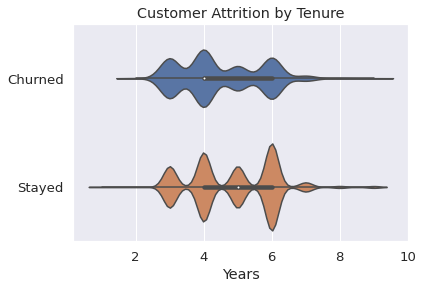

In [ ]:
# Calculate the z-scores of tenure
tenure_zscores = zscore(a=client_df['num_years_antig'])

#Convert to absolute values
abs_tenure_zscores = np.abs(tenure_zscores)

#Extract Columns of interest
churn_tenure= client_df[['churn','num_years_antig']]

#Add Z-Score Column
churn_tenure['z_score'] = list(abs_tenure_zscores)

#Remove Outliers
churned_tenure_filtered = churn_tenure[churn_tenure['z_score'] < 3 ]

#Visualize tenure by retauned customer and churner
vio = sns.violinplot(y=churned_tenure_filtered["churn"], x=churned_tenure_filtered["num_years_antig"])

#Settings
vio.set(xlabel='Years', ylabel='')
vio.set_title("Customer Attrition by Tenure")
plt.show()

In [ ]:
#The most popular electricity campaign
ele_nm = client_df.loc[(client_df['churn']>= 'Stayed') & (client_df['net_margin']>0), ['id', 'origin_up', 'net_margin']]

ele_nm.value_counts(subset=['origin_up'])

origin_up                       
lxidpiddsbxsbosboudacockeimpuepw    6155
kamkkxfxxuwbdslkwifmmcsiusiuosws    4002
ldkssxwpmemidmecebumciepifcamkci    2801
MISSING                               58
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
dtype: int64

In [ ]:
##Highest netting electricity subscription campaign
print(ele_nm.groupby('origin_up')['net_margin'].agg('sum').sort_values(ascending=False))

origin_up
lxidpiddsbxsbosboudacockeimpuepw    1230753.01
kamkkxfxxuwbdslkwifmmcsiusiuosws     627964.96
ldkssxwpmemidmecebumciepifcamkci     564951.43
MISSING                               16386.00
usapbepcfoloekilkwsdiboslwaxobdp        250.40
ewxeelcelemmiwuafmddpobolfuxioce         46.22
Name: net_margin, dtype: float64


In [ ]:
##Select current customers with positive margins
top_customers = client_df.loc[(client_df['churn']>='Stayed') & (client_df['net_margin']>0), ['id', 'num_years_antig', 'net_margin']]

##Top 10 customers by net margin
top_customers.sort_values(by=['net_margin'], ascending=False).head(10)

,id,num_years_antig,net_margin
10718,d00e8a9951b5551d8f02e45f9ed2b0dd,3,10203.50
12348,818b8bca0a9d7668252d46b978169325,4,4346.37
7794,a3a739686fbd5ba8b4a21ec835507b6d,4,4305.79
12624,ee98a86efa759681cc59c7d4e0d0312f,4,3407.65
4876,9590c7a6100ae76ec078aa177ffb8d0d,3,3215.03
3478,e7bdc7743d73a9bf94cc3c6a293fca93,4,2711.19
4958,9a0411074f84ea385f555943f27a2d81,3,2653.59
7236,41b7c011f9d87044bb2e297264e95080,6,2625.38
10685,e5636f7ada7a80747af18b285632767e,10,2467.98
9345,078b4e5f8ea9a2f5f4c667f2d2236791,4,2340.78
